In [1]:
__depends__ = [
    "../../../data/database-results/phase-1/timestamp.txt",
    "../../../data/database-observations/timestamp.txt",
]
__dest__ = [
    "../../../figures/tcre-plot.pdf",
]

In [2]:
TCRE_FIGURE_PDF = __dest__[0]

In [3]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [4]:
%load_ext autoreload

%autoreload 2

<IPython.core.display.Javascript object>

# TCRE plots

In [5]:
import logging
import os.path
import re
from pathlib import Path

from scmdata.run import ScmRun

import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>

pyam - INFO: Running in a notebook, setting `pyam` logging level to `logging.INFO` and adding stderr handler


<IPython.core.display.Javascript object>

In [6]:
from utils import load_database_files, prep_str_for_filename

/Users/znicholls/Documents/AGCEC/RCMIP/rcmip/notebooks/results/phase-1/utils.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


<IPython.core.display.Javascript object>

In [7]:
logger = logging.getLogger()

<IPython.core.display.Javascript object>

## Load data

In [8]:
RESULTS_PATH = os.path.join("..", "..", "..", "data", "database-results", "phase-1")
RESULTS_PATH

'../../../data/database-results/phase-1'

<IPython.core.display.Javascript object>

In [9]:
results_files = list(Path(RESULTS_PATH).rglob("*.nc"))
print("Number of available files: {}".format(len(results_files)))
results_files[:5]

Number of available files: 10270


[PosixPath('../../../data/database-results/phase-1/rcmip-phase-1_cicero-scm-ecs3_world_effective-radiative-forcing-anthropogenic-f-gases-pfc-cf4.nc'),
 PosixPath('../../../data/database-results/phase-1/rcmip-phase-1_magicc7.1.0.beta-mpi-esm1-2-hr-r1i1p1f1_world_emissions-f-gases-hfc-hfc125.nc'),
 PosixPath('../../../data/database-results/phase-1/rcmip-phase-1_cicero-scm-ecs3_world_radiative-forcing-anthropogenic-tropospheric-ozone.nc'),
 PosixPath('../../../data/database-results/phase-1/rcmip-phase-1_magicc7.1.0.beta-bcc-esm1-r1i1p1f1_world_radiative-forcing-anthropogenic-aerosols-aerosols-radiation-interactions.nc'),
 PosixPath('../../../data/database-results/phase-1/rcmip-phase-1_fair-1.5-ens_world_atmospheric-concentrations-f-gases-pfc-cf4-50th-quantile.nc')]

<IPython.core.display.Javascript object>

In [10]:
variables_of_interest = ["Surface Air Temperature Change", "Emissions|CO2"]
drop_models = ["escimo", "hector"]  # broken data...  # broken data...
relevant_files = [
    str(p)
    for p in results_files
    if any(
        [
            bool(re.match(".*{}.*".format(prep_str_for_filename(v)), str(p)))
            for v in variables_of_interest
        ]
    )
    and not any([v in str(p) for v in drop_models])
]
print("Number of relevant files: {}".format(len(relevant_files)))
relevant_files[:5]

Number of relevant files: 409


['../../../data/database-results/phase-1/rcmip-phase-1_mce,v1-1,cmip5-mri-cgcm3-calib_world_cumulative-emissions-co2.nc',
 '../../../data/database-results/phase-1/rcmip-phase-1_magicc7.1.0.beta-cesm2-r1i1p1f1_world_emissions-co2-magicc-afolu.nc',
 '../../../data/database-results/phase-1/rcmip-phase-1_ar5ir2box-cmip6-bcc-csm2-mr-r1i1p1f1-calib_world_surface-air-temperature-change.nc',
 '../../../data/database-results/phase-1/rcmip-phase-1_mce,v1-1,cmip6-gfdl-cm4-calib_world_emissions-co2.nc',
 '../../../data/database-results/phase-1/rcmip-phase-1_umd-emgc,5,prob_world_surface-air-temperature-change-83th-quantile.nc']

<IPython.core.display.Javascript object>

In [11]:
logging.getLogger("scmdata").setLevel(logging.WARNING)
db = load_database_files(relevant_files)
logging.getLogger("scmdata").setLevel(logging.INFO)
db.head()

time                                                                                                              1750-01-01 00:00:00  \
region model          scenario       climatemodel                   variable                 unit_context unit                          
World  not_applicable 1pctCO2        MCE,v1-1,CMIP5-MRI-CGCM3-CALIB Cumulative Emissions|CO2 not_required Mt CO2                  NaN   
                      1pctCO2-4xext  MCE,v1-1,CMIP5-MRI-CGCM3-CALIB Cumulative Emissions|CO2 not_required Mt CO2                  NaN   
                      1pctCO2-cdr    MCE,v1-1,CMIP5-MRI-CGCM3-CALIB Cumulative Emissions|CO2 not_required Mt CO2                  NaN   
                      abrupt-0p5xCO2 MCE,v1-1,CMIP5-MRI-CGCM3-CALIB Cumulative Emissions|CO2 not_required Mt CO2                  NaN   
                      abrupt-2xCO2   MCE,v1-1,CMIP5-MRI-CGCM3-CALIB Cumulative Emissions|CO2 not_required Mt CO2                  NaN   

time                                                                                                              1751-01-01 00:00:00  \
region model          scenario       climatemodel                   variable                 unit_context unit                          
World  not_applicable 1pctCO2        MCE,v1-1,CMIP5-MRI-CGCM3-CALIB Cumulative Emissions|CO2 not_required Mt CO2                  NaN   
                      1pctCO2-4xext  MCE,v1-1,CMIP5-MRI-CGCM3-CALIB Cumulative Emissions|CO2 not_required Mt CO2                  NaN   
                      1pctCO2-cdr    MCE,v1-1,CMIP5-MRI-CGCM3-CALIB Cumulative Emissions|CO2 not_required Mt CO2                  NaN   
                      abrupt-0p5xCO2 MCE,v1-1,CMIP5-MRI-CGCM3-CALIB Cumulative Emissions|CO2 not_required Mt CO2                  NaN   
                      abrupt-2xCO2   MCE,v1-1,CMIP5-MRI-CGCM3-CALIB Cumulative Emissions|CO2 not_required Mt CO2                  NaN   

time                                                                                                              1752-01-01 00:00:00  \
region model          scenario       climatemodel                   variable                 unit_context unit                          
World  not_applicable 1pctCO2        MCE,v1-1,CMIP5-MRI-CGCM3-CALIB Cumulative Emissions|CO2 not_required Mt CO2                  NaN   
                      1pctCO2-4xext  MCE,v1-1,CMIP5-MRI-CGCM3-CALIB Cumulative Emissions|CO2 not_required Mt CO2                  NaN   
                      1pctCO2-cdr    MCE,v1-1,CMIP5-MRI-CGCM3-CALIB Cumulative Emissions|CO2 not_required Mt CO2                  NaN   
                      abrupt-0p5xCO2 MCE,v1-1,CMIP5-MRI-CGCM3-CALIB Cumulative Emissions|CO2 not_required Mt CO2                  NaN   
                      abrupt-2xCO2   MCE,v1-1,CMIP5-MRI-CGCM3-CALIB Cumulative Emissions|CO2 not_required Mt CO2                  NaN   

time                                                                                                              1753-01-01 00:00:00  \
region model          scenario       climatemodel                   variable                 unit_context unit                          
World  not_applicable 1pctCO2        MCE,v1-1,CMIP5-MRI-CGCM3-CALIB Cumulative Emissions|CO2 not_required Mt CO2                  NaN   
                      1pctCO2-4xext  MCE,v1-1,CMIP5-MRI-CGCM3-CALIB Cumulative Emissions|CO2 not_required Mt CO2                  NaN   
                      1pctCO2-cdr    MCE,v1-1,CMIP5-MRI-CGCM3-CALIB Cumulative Emissions|CO2 not_required Mt CO2                  NaN   
                      abrupt-0p5xCO2 MCE,v1-1,CMIP5-MRI-CGCM3-CALIB Cumulative Emissions|CO2 not_required Mt CO2                  NaN   
                      abrupt-2xCO2   MCE,v1-1,CMIP5-MRI-CGCM3-CALIB Cumulative Emissions|CO2 not_required Mt CO2                  NaN   

time                                                                                                              1754-01-01 00:00:00  \
region model          s

<IPython.core.display.Javascript object>

In [12]:
db = db.filter(scenario=["1pctCO2", "1pctCO2-4xext"])
sorted(db["climatemodel"].unique())

['ACC2 | version 4.2',
 'Cicero-SCM',
 'Cicero-SCM-ECS3',
 'FaIR-1.5-DEFAULT',
 'FaIR-1.5-ENS',
 'GIR (3 box)',
 'GREB-v1.0.1-ECMWF_IFS-ALL',
 'MAGICC7.1.0.beta-rcmip-phase-1',
 'MAGICC7.1.0.beta_AWI-CM-1-1-MR_R1I1P1F1',
 'MAGICC7.1.0.beta_BCC-CSM2-MR_R1I1P1F1',
 'MAGICC7.1.0.beta_BCC-ESM1_R1I1P1F1',
 'MAGICC7.1.0.beta_CANESM5_R10I1P1F1',
 'MAGICC7.1.0.beta_CANESM5_R1I1P1F1',
 'MAGICC7.1.0.beta_CANESM5_R1I1P2F1',
 'MAGICC7.1.0.beta_CESM2-WACCM_R1I1P1F1',
 'MAGICC7.1.0.beta_CESM2_R1I1P1F1',
 'MAGICC7.1.0.beta_CNRM-CM6-1-HR_R1I1P1F2',
 'MAGICC7.1.0.beta_CNRM-CM6-1_R1I1P1F2',
 'MAGICC7.1.0.beta_CNRM-ESM2-1_R1I1P1F2',
 'MAGICC7.1.0.beta_E3SM-1-0_R1I1P1F1',
 'MAGICC7.1.0.beta_EC-EARTH3-VEG_R1I1P1F1',
 'MAGICC7.1.0.beta_FGOALS-G3_R1I1P1F1',
 'MAGICC7.1.0.beta_GISS-E2-1-G_R1I1P1F1',
 'MAGICC7.1.0.beta_GISS-E2-1-H_R1I1P1F1',
 'MAGICC7.1.0.beta_GISS-E2-2-G_R1I1P1F1',
 'MAGICC7.1.0.beta_IPSL-CM6A-LR_R10I1P1F1',
 'MAGICC7.1.0.beta_IPSL-CM6A-LR_R1I1P1F1',
 'MAGICC7.1.0.beta_IPSL-CM6A-LR_R1I1P1F2',

<IPython.core.display.Javascript object>

In [13]:
sorted(db.filter(variable="Emissions*")["climatemodel"].unique())

['GIR (3 box)',
 'MAGICC7.1.0.beta-rcmip-phase-1',
 'MAGICC7.1.0.beta_AWI-CM-1-1-MR_R1I1P1F1',
 'MAGICC7.1.0.beta_BCC-CSM2-MR_R1I1P1F1',
 'MAGICC7.1.0.beta_BCC-ESM1_R1I1P1F1',
 'MAGICC7.1.0.beta_CANESM5_R10I1P1F1',
 'MAGICC7.1.0.beta_CANESM5_R1I1P1F1',
 'MAGICC7.1.0.beta_CANESM5_R1I1P2F1',
 'MAGICC7.1.0.beta_CESM2-WACCM_R1I1P1F1',
 'MAGICC7.1.0.beta_CESM2_R1I1P1F1',
 'MAGICC7.1.0.beta_CNRM-CM6-1-HR_R1I1P1F2',
 'MAGICC7.1.0.beta_CNRM-CM6-1_R1I1P1F2',
 'MAGICC7.1.0.beta_CNRM-ESM2-1_R1I1P1F2',
 'MAGICC7.1.0.beta_E3SM-1-0_R1I1P1F1',
 'MAGICC7.1.0.beta_EC-EARTH3-VEG_R1I1P1F1',
 'MAGICC7.1.0.beta_FGOALS-G3_R1I1P1F1',
 'MAGICC7.1.0.beta_GISS-E2-1-G_R1I1P1F1',
 'MAGICC7.1.0.beta_GISS-E2-1-H_R1I1P1F1',
 'MAGICC7.1.0.beta_GISS-E2-2-G_R1I1P1F1',
 'MAGICC7.1.0.beta_IPSL-CM6A-LR_R10I1P1F1',
 'MAGICC7.1.0.beta_IPSL-CM6A-LR_R1I1P1F1',
 'MAGICC7.1.0.beta_IPSL-CM6A-LR_R1I1P1F2',
 'MAGICC7.1.0.beta_MCM-UA-1-0_R1I1P1F2',
 'MAGICC7.1.0.beta_MIROC-ES2L_R1I1P1F2',
 'MAGICC7.1.0.beta_MIROC6_R1I1P1F1',
 'MAGI

<IPython.core.display.Javascript object>

In [14]:
cumulative_emms = (
    db.filter(variable="Emissions|CO2").timeseries().dropna(how="all", axis="rows")
)
cumulative_emms = cumulative_emms.cumsum(axis="columns").reset_index()
cumulative_emms["variable"] = "Cumulative Emissions|CO2"
cumulative_emms["unit"] = cumulative_emms["unit"].str.replace("/yr", "")
cumulative_emms = ScmRun(cumulative_emms).convert_unit("PgC")
cumulative_emms.head().dropna(axis="columns")

time                                                                                                           1850-01-01  \
model          scenario      region variable                 unit climatemodel                   unit_context               
not_applicable 1pctCO2       World  Cumulative Emissions|CO2 PgC  MCE,v1-1,CMIP6-GFDL-CM4-CALIB  NaN              3.26467   
               1pctCO2-4xext World  Cumulative Emissions|CO2 PgC  MCE,v1-1,CMIP6-GFDL-CM4-CALIB  NaN              3.26467   
               1pctCO2       World  Cumulative Emissions|CO2 PgC  MCE,v1-1,CMIP6-NESM3-CALIB     NaN              3.26467   
               1pctCO2-4xext World  Cumulative Emissions|CO2 PgC  MCE,v1-1,CMIP6-NESM3-CALIB     NaN              3.26467   
               1pctCO2       World  Cumulative Emissions|CO2 PgC  MCE,v1-1,CMIP5-GISS-E2-R-CALIB NaN              3.26467   

time                                                                                                           1851-01-01  \
model          scenario      region variable                 unit climatemodel                   unit_context               
not_applicable 1pctCO2       World  Cumulative Emissions|CO2 PgC  MCE,v1-1,CMIP6-GFDL-CM4-CALIB  NaN            10.282362   
               1pctCO2-4xext World  Cumulative Emissions|CO2 PgC  MCE,v1-1,CMIP6-GFDL-CM4-CALIB  NaN            10.282362   
               1pctCO2       World  Cumulative Emissions|CO2 PgC  MCE,v1-1,CMIP6-NESM3-CALIB     NaN            10.247548   
               1pctCO2-4xext World  Cumulative Emissions|CO2 PgC  MCE,v1-1,CMIP6-NESM3-CALIB     NaN            10.247548   
               1pctCO2       World  Cumulative Emissions|CO2 PgC  MCE,v1-1,CMIP5-GISS-E2-R-CALIB NaN            10.276847   

time                                                                                                           1852-01-01  \
model          scenario      region variable                 unit climatemodel                   unit_context               
not_applicable 1pctCO2       World  Cumulative Emissions|CO2 PgC  MCE,v1-1,CMIP6-GFDL-CM4-CALIB  NaN            17.786444   
               1pctCO2-4xext World  Cumulative Emissions|CO2 PgC  MCE,v1-1,CMIP6-GFDL-CM4-CALIB  NaN            17.786444   
               1pctCO2       World  Cumulative Emissions|CO2 PgC  MCE,v1-1,CMIP6-NESM3-CALIB     NaN            17.707024   
               1pctCO2-4xext World  Cumulative Emissions|CO2 PgC  MCE,v1-1,CMIP6-NESM3-CALIB     NaN            17.707024   
               1pctCO2       World  Cumulative Emissions|CO2 PgC  MCE,v1-1,CMIP5-GISS-E2-R-CALIB NaN            17.784191   

time                                                                                                           1853-01-01  \
model          scenario      region variable                 unit climatemodel                   unit_context               
not_applicable 1pctCO2       World  Cumulative Emissions|CO2 PgC  MCE,v1-1,CMIP6-GFDL-CM4-CALIB  NaN            25.747751   
               1pctCO2-4xext World  Cumulative Emissions|CO2 PgC  MCE,v1-1,CMIP6-GFDL-CM4-CALIB  NaN            25.747751   
               1pctCO2       World  Cumulative Emissions|CO2 PgC  MCE,v1-1,CMIP6-NESM3-CALIB     NaN            25.615722   
               1pctCO2-4xext World  Cumulative Emissions|CO2 PgC  MCE,v1-1,CMIP6-NESM3-CALIB     NaN            25.615722   
               1pctCO2       World  Cumulative Emissions|CO2 PgC  MCE,v1-1,CMIP5-GISS-E2-R-CALIB NaN            25.753589   

time                                                                                                           1854-01-01  \
model          scenario      region variable                 unit climatemodel                   unit_context               
not_applicable 1pctCO2       World  Cumulative Emissions|CO2 PgC  MCE,v1-1,CMIP6-GFDL-CM4-CALIB  NaN            34.135552   
               1pctCO2-4xext World  Cumulative Emissions|CO2 PgC  MCE,v1-1,CMIP6-GFDL-CM4-CALIB  NaN            34.135552

<IPython.core.display.Javascript object>

In [15]:
sorted(cumulative_emms["climatemodel"].unique())

['GIR (3 box)',
 'MCE,v1-1,CMIP5-ACCESS1.0-CALIB',
 'MCE,v1-1,CMIP5-ACCESS1.3-CALIB',
 'MCE,v1-1,CMIP5-BCC-CSM1.1-CALIB',
 'MCE,v1-1,CMIP5-BNU-ESM-CALIB',
 'MCE,v1-1,CMIP5-CCSM4-CALIB',
 'MCE,v1-1,CMIP5-CNRM-CM5-CALIB',
 'MCE,v1-1,CMIP5-CSIRO-Mk3.6.0-CALIB',
 'MCE,v1-1,CMIP5-CanESM2-CALIB',
 'MCE,v1-1,CMIP5-FGOALS-s2-CALIB',
 'MCE,v1-1,CMIP5-GFDL-CM3-CALIB',
 'MCE,v1-1,CMIP5-GFDL-ESM2G-CALIB',
 'MCE,v1-1,CMIP5-GFDL-ESM2M-CALIB',
 'MCE,v1-1,CMIP5-GISS-E2-H-CALIB',
 'MCE,v1-1,CMIP5-GISS-E2-R-CALIB',
 'MCE,v1-1,CMIP5-HadGEM2-ES-CALIB',
 'MCE,v1-1,CMIP5-INM-CM4-CALIB',
 'MCE,v1-1,CMIP5-IPSL-CM5A-LR-CALIB',
 'MCE,v1-1,CMIP5-IPSL-CM5B-LR-CALIB',
 'MCE,v1-1,CMIP5-MIROC-ESM-CALIB',
 'MCE,v1-1,CMIP5-MIROC5-CALIB',
 'MCE,v1-1,CMIP5-MPI-ESM-LR-CALIB',
 'MCE,v1-1,CMIP5-MPI-ESM-MR-CALIB',
 'MCE,v1-1,CMIP5-MPI-ESM-P-CALIB',
 'MCE,v1-1,CMIP5-MRI-CGCM3-CALIB',
 'MCE,v1-1,CMIP5-NorESM1-M-CALIB',
 'MCE,v1-1,CMIP6-BCC-CSM2-MR-CALIB',
 'MCE,v1-1,CMIP6-BCC-ESM1-CALIB',
 'MCE,v1-1,CMIP6-CAMS-CSM1-0-CALIB',


<IPython.core.display.Javascript object>

(0.0, 10000.0)

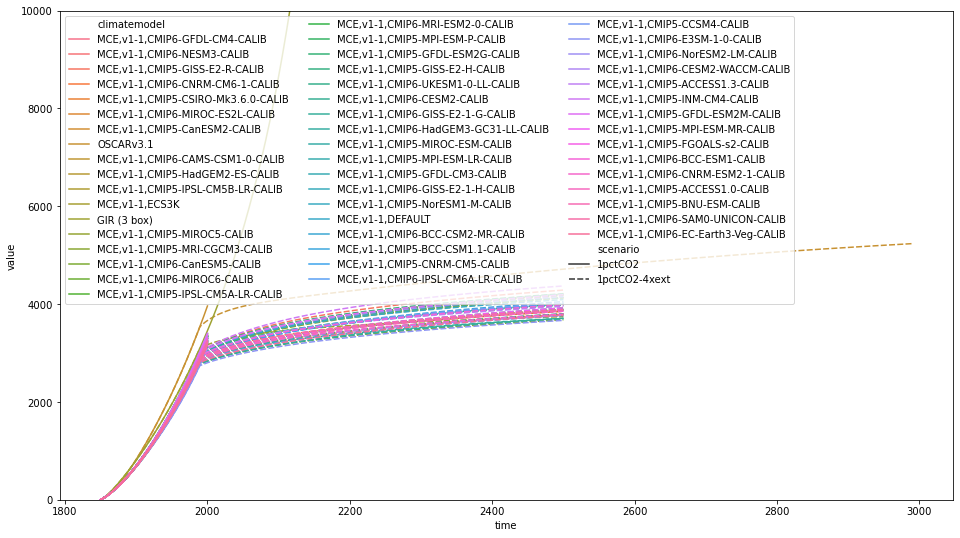

<IPython.core.display.Javascript object>

In [16]:
ax = plt.figure(figsize=(16, 9)).add_subplot(111)
cumulative_emms.lineplot(hue="climatemodel", style="scenario", ax=ax)
ax.legend(ncol=3)
ax.set_ylim([0, 10 ** 4])

In [17]:
db = db.append(cumulative_emms)
db.head()

time                                                                                                                                  1750-01-01 00:00:00  \
region model          scenario      climatemodel                               variable                       unit_context unit                             
World  not_applicable 1pctCO2       MCE,v1-1,CMIP5-MRI-CGCM3-CALIB             Cumulative Emissions|CO2       not_required Mt CO2                     NaN   
                      1pctCO2-4xext MCE,v1-1,CMIP5-MRI-CGCM3-CALIB             Cumulative Emissions|CO2       not_required Mt CO2                     NaN   
       unspecified    1pctCO2       MAGICC7.1.0.beta_CESM2_R1I1P1F1            Emissions|CO2|MAGICC AFOLU     not_required Mt CO2/yr                  NaN   
                      1pctCO2-4xext MAGICC7.1.0.beta_CESM2_R1I1P1F1            Emissions|CO2|MAGICC AFOLU     not_required Mt CO2/yr                  NaN   
                      1pctCO2       ar5ir2box-CMIP6-BCC-CSM2-MR_r1i1p1f1-CALIB Surface Air Temperature Change not_required K                          NaN   

time                                                                                                                                  1751-01-01 00:00:00  \
region model          scenario      climatemodel                               variable                       unit_context unit                             
World  not_applicable 1pctCO2       MCE,v1-1,CMIP5-MRI-CGCM3-CALIB             Cumulative Emissions|CO2       not_required Mt CO2                     NaN   
                      1pctCO2-4xext MCE,v1-1,CMIP5-MRI-CGCM3-CALIB             Cumulative Emissions|CO2       not_required Mt CO2                     NaN   
       unspecified    1pctCO2       MAGICC7.1.0.beta_CESM2_R1I1P1F1            Emissions|CO2|MAGICC AFOLU     not_required Mt CO2/yr                  NaN   
                      1pctCO2-4xext MAGICC7.1.0.beta_CESM2_R1I1P1F1            Emissions|CO2|MAGICC AFOLU     not_required Mt CO2/yr                  NaN   
                      1pctCO2       ar5ir2box-CMIP6-BCC-CSM2-MR_r1i1p1f1-CALIB Surface Air Temperature Change not_required K                          NaN   

time                                                                                                                                  1752-01-01 00:00:00  \
region model          scenario      climatemodel                               variable                       unit_context unit                             
World  not_applicable 1pctCO2       MCE,v1-1,CMIP5-MRI-CGCM3-CALIB             Cumulative Emissions|CO2       not_required Mt CO2                     NaN   
                      1pctCO2-4xext MCE,v1-1,CMIP5-MRI-CGCM3-CALIB             Cumulative Emissions|CO2       not_required Mt CO2                     NaN   
       unspecified    1pctCO2       MAGICC7.1.0.beta_CESM2_R1I1P1F1            Emissions|CO2|MAGICC AFOLU     not_required Mt CO2/yr                  NaN   
                      1pctCO2-4xext MAGICC7.1.0.beta_CESM2_R1I1P1F1            Emissions|CO2|MAGICC AFOLU     not_required Mt CO2/yr                  NaN   
                      1pctCO2       ar5ir2box-CMIP6-BCC-CSM2-MR_r1i1p1f1-CALIB Surface Air Temperature Change not_required K                          NaN   

time                                                                                                                                  1753-01-01 00:00:00  \
region model          scenario      climatemodel                               variable                       unit_context unit                             
World  not_applicable 1pctCO2       MCE,v1-1,CMIP5-MRI-CGCM3-CALIB             Cumulative Emissions|CO2       not_required Mt CO2                     NaN   
                      1pctCO2-4xext MCE,v1-1,CMIP5-MRI-CGCM3-CALIB             Cumulative Emissions|CO2       not_required Mt CO2                     NaN   
       unspecified    1pctCO2       MAGICC7.1.0.beta_CESM2_R1I1P1F1     

<IPython.core.display.Javascript object>

In [18]:
sns_df = (
    db.filter(
        variable=["Cumulative Emissions|CO2", "Surface Air Temperature Change"],
        unit=["K", "PgC"],
        region="World",
        #         climatemodel="OSCAR*",
    )
    .timeseries(time_axis="year")
    .reset_index(["unit", "unit_context"], drop=True)
    #     .unstack("unit")
    .unstack("variable")
    .stack("time")
    .dropna(axis="rows", how="any")
    .reset_index()
)
sns_df

variable region           model       scenario  \
0         World  not_applicable        1pctCO2   
1         World  not_applicable        1pctCO2   
2         World  not_applicable        1pctCO2   
3         World  not_applicable        1pctCO2   
4         World  not_applicable        1pctCO2   
...         ...             ...            ...   
41887     World     unspecified  1pctCO2-4xext   
41888     World     unspecified  1pctCO2-4xext   
41889     World     unspecified  1pctCO2-4xext   
41890     World     unspecified  1pctCO2-4xext   
41891     World     unspecified  1pctCO2-4xext   

variable                    climatemodel  time  Cumulative Emissions|CO2  \
0         MCE,v1-1,CMIP5-ACCESS1.0-CALIB  1850                  3.264670   
1         MCE,v1-1,CMIP5-ACCESS1.0-CALIB  1851                 10.293666   
2         MCE,v1-1,CMIP5-ACCESS1.0-CALIB  1852                 17.812303   
3         MCE,v1-1,CMIP5-ACCESS1.0-CALIB  1853                 25.789887   
4         MCE,v1-1,CMIP5-ACCESS1.0-CALIB  1854                 34.195431   
...                                  ...   ...                       ...   
41887                          OSCARv3.1  2986               5232.867648   
41888                          OSCARv3.1  2987               5233.688987   
41889                          OSCARv3.1  2988               5234.509456   
41890                          OSCARv3.1  2989               5235.329053   
41891                          OSCARv3.1  2990               5236.147779   

variable  Surface Air Temperature Change  
0                               0.000000  
1                               0.008479  
2                               0.021769  
3                               0.038106  
4                               0.056469  
...                                  ...  
41887                           5.342057  
41888                           5.342084  
41889                           5.342110  
41890                           5.342137  
41891                           5.342163  

[41892 rows x 7 columns]

<IPython.core.display.Javascript object>

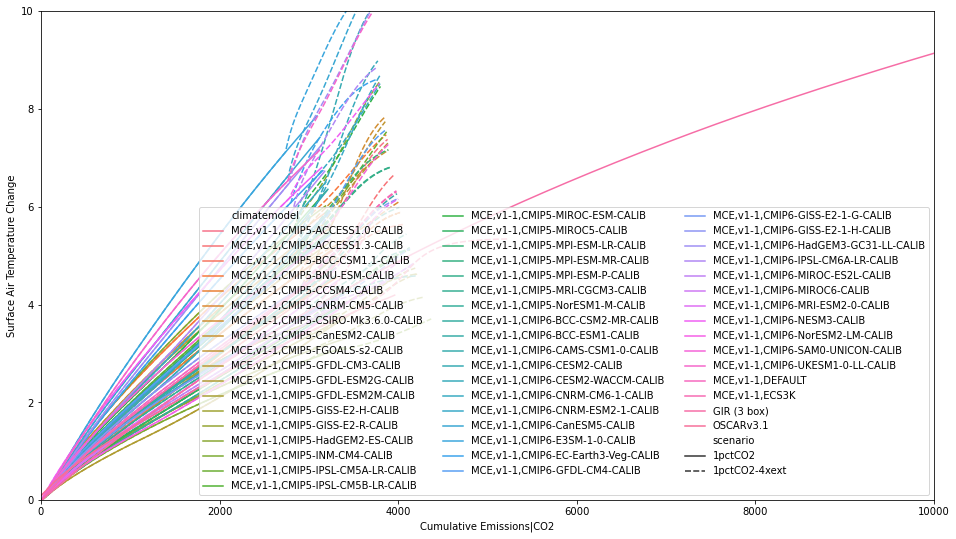

<IPython.core.display.Javascript object>

In [19]:
ax = plt.figure(figsize=(16, 9)).add_subplot(111)
ax = sns.lineplot(
    data=sns_df,
    x="Cumulative Emissions|CO2",
    y="Surface Air Temperature Change",
    ci=None,
    hue="climatemodel",
    style="scenario",
    ax=ax,
)

ax.set_ylim([0, 10])
ax.set_xlim([0, 10 ** 4])
ax.legend(ncol=3)

In [25]:
def get_model_family(inp):
    if inp.startswith("MCE"):
        return "MCE"

    if inp.startswith("GIR"):
        return "GIR"

    if inp.startswith("OSCARv"):
        return inp

    if inp.startswith("hector|1d51f"):
        return "hector|1d51f"

    raise NotImplementedError(inp)

<IPython.core.display.Javascript object>

In [26]:
def get_variable_label(inp):
    if inp.startswith("Surface Air Temperature"):
        return "{} (K)".format(inp)

    if inp.startswith("Cumulative Emissions|CO2"):
        return "Cumulative Emissions CO2 (PgC)"

    return inp

<IPython.core.display.Javascript object>

In [27]:
sns_df_grouped = sns_df.copy()
sns_df_grouped["Model family"] = sns_df_grouped["climatemodel"].apply(get_model_family)
sns_df_grouped["Scenario"] = sns_df_grouped["scenario"]
sns_df_grouped.columns = sns_df_grouped.columns.map(get_variable_label)
sns_df_grouped.head()

variable region           model scenario                    climatemodel  \
0         World  not_applicable  1pctCO2  MCE,v1-1,CMIP5-ACCESS1.0-CALIB   
1         World  not_applicable  1pctCO2  MCE,v1-1,CMIP5-ACCESS1.0-CALIB   
2         World  not_applicable  1pctCO2  MCE,v1-1,CMIP5-ACCESS1.0-CALIB   
3         World  not_applicable  1pctCO2  MCE,v1-1,CMIP5-ACCESS1.0-CALIB   
4         World  not_applicable  1pctCO2  MCE,v1-1,CMIP5-ACCESS1.0-CALIB   

variable  time  Cumulative Emissions CO2 (PgC)  \
0         1850                        3.264670   
1         1851                       10.293666   
2         1852                       17.812303   
3         1853                       25.789887   
4         1854                       34.195431   

variable  Surface Air Temperature Change (K) Model family Scenario  
0                                   0.000000          MCE  1pctCO2  
1                                   0.008479          MCE  1pctCO2  
2                                   0.021769          MCE  1pctCO2  
3                                   0.038106          MCE  1pctCO2  
4                                   0.056469          MCE  1pctCO2

<IPython.core.display.Javascript object>

'../../../figures/tcre-plot.pdf'

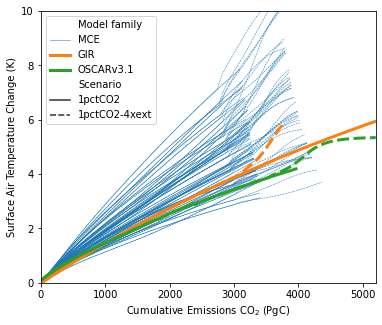

<IPython.core.display.Javascript object>

In [30]:
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)
ax = sns.lineplot(
    data=sns_df_grouped,
    x="Cumulative Emissions CO2 (PgC)",
    y="Surface Air Temperature Change (K)",
    ci=None,
    estimator=None,
    units="climatemodel",
    hue="Model family",
    size="Model family",
    style="Scenario",
    ax=ax,
    sizes={"MCE": 0.5, "GIR": 3.0, "OSCARv3.1": 3.0}
    #     linewidth=2.5,
)

ax.set_ylim([0, 10])
ax.set_xlim([0, 5.2 * 10 ** 3])
ax.set_xlabel("Cumulative Emissions CO$_2$ (PgC)")
# ax.legend(ncol=3)
fig.savefig(TCRE_FIGURE_PDF)
TCRE_FIGURE_PDF